### ЛР4

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [2]:
# чтение обучающей выборки
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
    # "sex" - пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "smoker" - курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
    # "region" - регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

<AxesSubplot:>

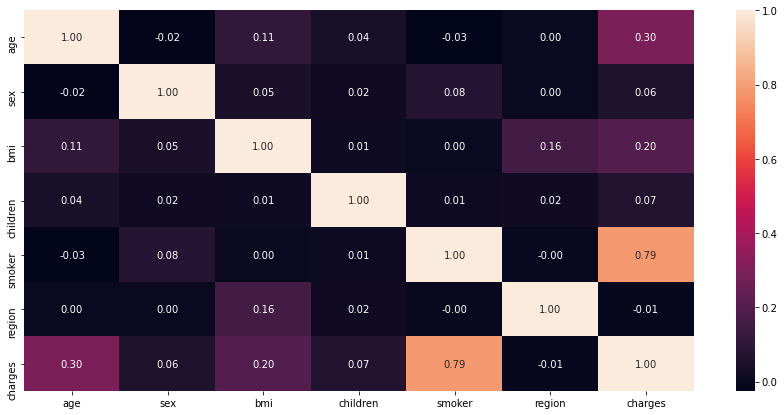

In [5]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [6]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [7]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      age  sex    bmi  children  smoker  region
461   42    1  30.00         0       1       3
322   34    1  30.80         0       1       3
224   42    1  24.64         0       1       2
711   50    0  23.54         2       0       2
58    53    0  22.88         1       1       2 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 461    22144.0320
322    35491.6400
224    19515.5416
711    10107.2206
58     23244.7902
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


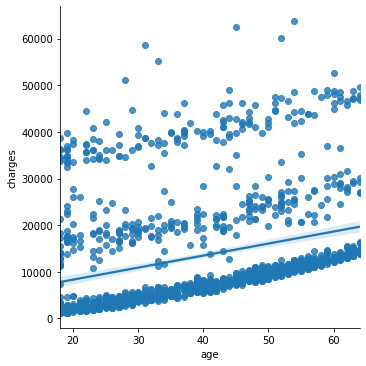

In [8]:
sns.lmplot(x = 'age',y = 'charges',data = data)

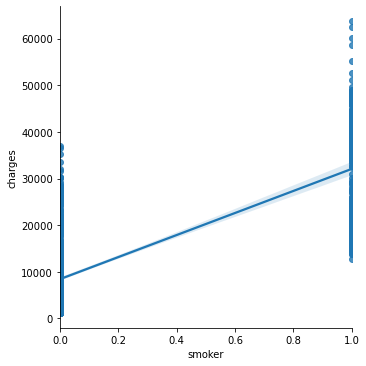

In [9]:
sns.lmplot(x='smoker',y='charges',data = data)

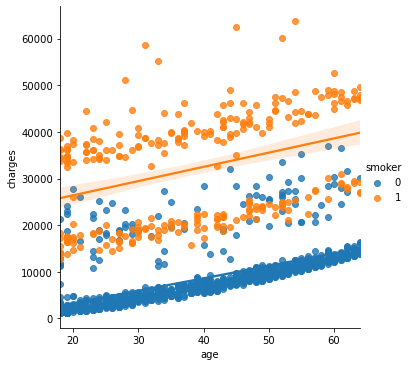

In [10]:
sns.lmplot(x = 'age',y = 'charges',hue = 'smoker',data = data)

### Построение линейной регрессии

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [12]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

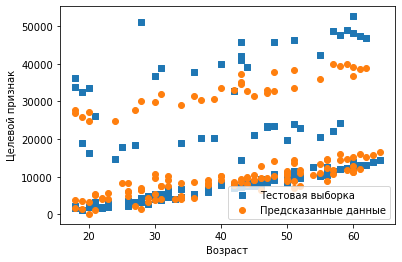

In [13]:
plt.scatter(X_test.age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show()

### SVM

In [14]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

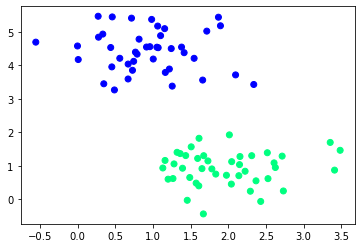

In [15]:
X , y = make_blobs(n_samples=125, centers=2, cluster_std=0.6, random_state=0)
# колич, кол кластеров, станд откл, 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=40, random_state=0)

plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

In [16]:
svc = SVC(kernel='linear')
svc.fit(train_X,train_y)

SVC(kernel='linear')

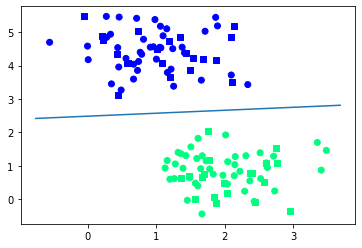

In [17]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

ax=plt.gca()
xlim=ax.get_xlim()
    
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')

w= svc.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(xlim[0], xlim[1])
yy= a * xx - (svc.intercept_[0]/ w[1])
plt.plot(xx, yy)

In [18]:
pred_y = svc.predict(test_X)

In [19]:
confusion_matrix(test_y, pred_y)

array([[21,  0],
       [ 0, 19]])

### Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [21]:
data = pd.read_csv('insurance.csv')
le = LabelEncoder()
    # "sex" - пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "smoker" - курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
    # "region" - регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
data['charges'] = data['charges'].astype(int)
X = data.drop(['charges', 'sex', 'smoker', 'region', 'age', 'children'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

       bmi
0  27.900
1  33.770
2  33.000
3  22.705
4  28.880 

Выходные данные:

 0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64


In [22]:
# Обучим дерево на всех признаках iris
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [23]:
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')